# Breast Cancer Classification using Keras-Regression

## Import Dataset and required libraries

In [9]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read the csv file 
Data = pd.read_csv('Breast_cancer_data.csv')

## Exploratory Data Analysis

In [10]:
Data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,Benign
1,20.57,17.77,132.90,1326.0,0.08474,Benign
2,19.69,21.25,130.00,1203.0,0.10960,Benign
3,11.42,20.38,77.58,386.1,0.14250,Benign
4,20.29,14.34,135.10,1297.0,0.10030,Benign


In [11]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    object 
dtypes: float64(5), object(1)
memory usage: 26.8+ KB


,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [12]:
#check how many values are missing (NaN)
Data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [13]:
Data['diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [14]:
# Handling Categorical data
Data['diagnosis'].unique()
Data['diagnosis'] = Data['diagnosis'].map({'Benign':0,'Malignant':1})
Data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Visualization

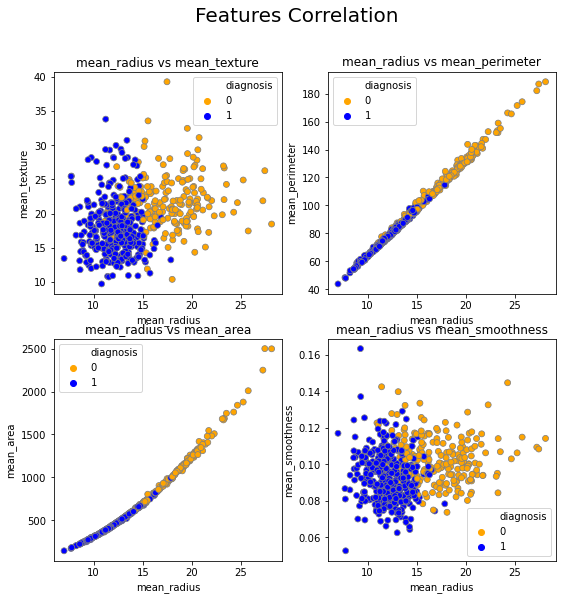

In [31]:
#featur correlation
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'

fig = plt.figure(figsize=(9,9))

plt.subplot(221)
ax1 = sns.scatterplot(x = Data['mean_radius'], y = Data['mean_texture'], hue = "diagnosis",
                    data = Data, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = Data['mean_radius'], y = Data['mean_perimeter'], hue = "diagnosis",
                    data = Data, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = Data['mean_radius'], y = Data['mean_area'], hue = "diagnosis",
                    data = Data, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = Data['mean_radius'], y = Data['mean_smoothness'], hue = "diagnosis",
                    data = Data, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')

fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()


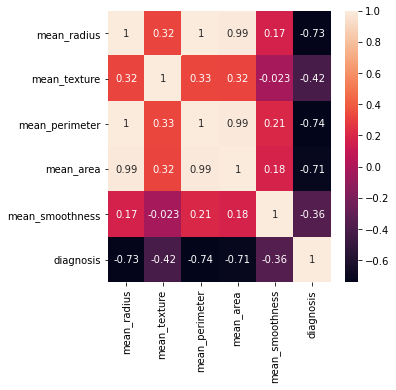

In [16]:
#correlation between different variables - some of them
plt.figure(figsize=(5,5)) 
sns.heatmap(Data['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)

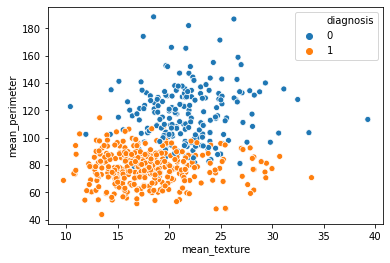

In [19]:
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = Data)

<ipython-input-28-a154bd981615>:9: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


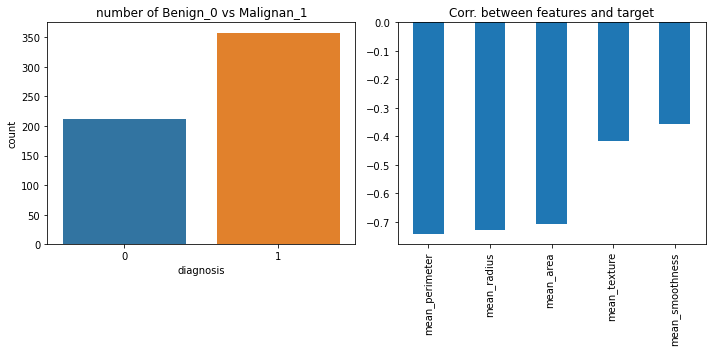

In [28]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)
fig.add_subplot(1,2,1)
sns.countplot(x='diagnosis',data = Data)
plt.title('number of Benign_0 vs Malignan_1')
fig.add_subplot(1,2,2)
Data.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')  

plt.tight_layout()

## Train Test Split

In [63]:
#prepare X (features) and y (target)
X = Data.drop(['diagnosis'],axis=1).values
y = Data['diagnosis'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (426, 5)
X_test shape: (143, 5)
y_train shape: (426,)
y_test shape: (143,)


## Scaling Data

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [65]:
#binary classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [66]:
# having 5 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model

In [67]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),verbose = 1,
          batch_size=128,epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 25ms/step - loss: 0.7212 - val_loss: 0.7206
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7181 - val_loss: 0.7176
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7149 - val_loss: 0.7145
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7113 - val_loss: 0.7111
Epoch 5/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7074 - val_loss: 0.7077
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7035 - val_loss: 0.7044
Epoch 7/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7002 - val_loss: 0.7014
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 0.6970 - val_loss: 0.6983
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6943 - val_loss: 0.6954
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 0.6914 - val_loss: 0.6927
Epoch 11/400
4/4 [==========

4/4 [==============================] - 0s 5ms/step - loss: 0.5319 - val_loss: 0.5429
Epoch 85/400
4/4 [==============================] - 0s 5ms/step - loss: 0.5301 - val_loss: 0.5411
Epoch 86/400
4/4 [==============================] - 0s 5ms/step - loss: 0.5282 - val_loss: 0.5394
Epoch 87/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5263 - val_loss: 0.5376
Epoch 88/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5244 - val_loss: 0.5359
Epoch 89/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5226 - val_loss: 0.5342
Epoch 90/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5207 - val_loss: 0.5324
Epoch 91/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5189 - val_loss: 0.5306
Epoch 92/400
4/4 [==============================] - 0s 4ms/step - loss: 0.5169 - val_loss: 0.5289
Epoch 93/400
4/4 [==============================] - 0s 5ms/step - loss: 0.5151 - val_loss: 0.5274
Epoch 94/400
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.3898 - val_loss: 0.4046
Epoch 168/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3884 - val_loss: 0.4032
Epoch 169/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3870 - val_loss: 0.4017
Epoch 170/400
4/4 [==============================] - 0s 5ms/step - loss: 0.3857 - val_loss: 0.4003
Epoch 171/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3844 - val_loss: 0.3989
Epoch 172/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3830 - val_loss: 0.3977
Epoch 173/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3816 - val_loss: 0.3967
Epoch 174/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3804 - val_loss: 0.3957
Epoch 175/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3791 - val_loss: 0.3946
Epoch 176/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3778 - val_loss: 0.3934
Epoch 177/400
4/4 [=====

Epoch 250/400
4/4 [==============================] - 0s 4ms/step - loss: 0.3010 - val_loss: 0.3159
Epoch 251/400
4/4 [==============================] - 0s 5ms/step - loss: 0.3001 - val_loss: 0.3148
Epoch 252/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2995 - val_loss: 0.3138
Epoch 253/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2987 - val_loss: 0.3131
Epoch 254/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2980 - val_loss: 0.3124
Epoch 255/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2973 - val_loss: 0.3117
Epoch 256/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2964 - val_loss: 0.3108
Epoch 257/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2958 - val_loss: 0.3098
Epoch 258/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2955 - val_loss: 0.3091
Epoch 259/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2948 - val_loss: 0.3086
Epoch 260/

4/4 [==============================] - 0s 5ms/step - loss: 0.2556 - val_loss: 0.2712
Epoch 333/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2552 - val_loss: 0.2705
Epoch 334/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2545 - val_loss: 0.2696
Epoch 335/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2541 - val_loss: 0.2687
Epoch 336/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2539 - val_loss: 0.2681
Epoch 337/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2537 - val_loss: 0.2677
Epoch 338/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2534 - val_loss: 0.2673
Epoch 339/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2529 - val_loss: 0.2671
Epoch 340/400
4/4 [==============================] - 0s 5ms/step - loss: 0.2522 - val_loss: 0.2670
Epoch 341/400
4/4 [==============================] - 0s 4ms/step - loss: 0.2519 - val_loss: 0.2670
Epoch 342/400
4/4 [=====

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


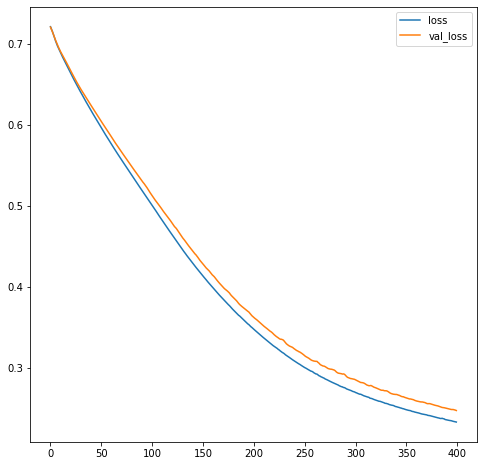

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(8,8))

## Early Stopping (let's track the val_loss and stop training once it begins increasing too much

In [85]:
model = Sequential()
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [87]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
14/14 [==============================] - 0s 8ms/step - loss: 0.7144 - val_loss: 0.7042
Epoch 2/400
14/14 [==============================] - 0s 2ms/step - loss: 0.7055 - val_loss: 0.6974
Epoch 3/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6984 - val_loss: 0.6919
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6924 - val_loss: 0.6874
Epoch 5/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6878 - val_loss: 0.6832
Epoch 6/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6834 - val_loss: 0.6796
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6798 - val_loss: 0.6762
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6760 - val_loss: 0.6724
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6722 - val_loss: 0.6688
Epoch 10/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6682 - val_loss: 0.6649
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.2583 - val_loss: 0.2596
Epoch 81/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2559 - val_loss: 0.2561
Epoch 82/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2536 - val_loss: 0.2543
Epoch 83/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2514 - val_loss: 0.2518
Epoch 84/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2495 - val_loss: 0.2504
Epoch 85/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2475 - val_loss: 0.2493
Epoch 86/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2458 - val_loss: 0.2475
Epoch 87/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2442 - val_loss: 0.2445
Epoch 88/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2421 - val_loss: 0.2439
Epoch 89/400
14/14 [==============================] - 0s 2ms/step - loss: 0.2404 - val_loss: 0.2425
Epoch 90/400


14/14 [==============================] - 0s 2ms/step - loss: 0.1812 - val_loss: 0.1878
Epoch 162/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1790 - val_loss: 0.1893
Epoch 163/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1791 - val_loss: 0.1888
Epoch 164/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1782 - val_loss: 0.1892
Epoch 165/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1787 - val_loss: 0.1901
Epoch 166/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1783 - val_loss: 0.1873
Epoch 167/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1771 - val_loss: 0.1876
Epoch 168/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1770 - val_loss: 0.1887
Epoch 169/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1766 - val_loss: 0.1870
Epoch 170/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1762 - val_loss: 0.1863
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.1636 - val_loss: 0.1765
Epoch 243/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1638 - val_loss: 0.1757
Epoch 244/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1637 - val_loss: 0.1764
Epoch 245/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1637 - val_loss: 0.1770
Epoch 246/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1636 - val_loss: 0.1755
Epoch 247/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.1768
Epoch 248/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1633 - val_loss: 0.1752
Epoch 249/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1631 - val_loss: 0.1759
Epoch 250/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1629 - val_loss: 0.1745
Epoch 251/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1628 - val_loss: 0.1752
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.1732
Epoch 324/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1601 - val_loss: 0.1723
Epoch 325/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1729
Epoch 326/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1592 - val_loss: 0.1738
Epoch 327/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1744
Epoch 328/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1604 - val_loss: 0.1754
Epoch 329/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1752
Epoch 330/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1730
Epoch 331/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1594 - val_loss: 0.1726
Epoch 332/400
14/14 [==============================] - 0s 2ms/step - loss: 0.1597 - val_loss: 0.1728
Epoc

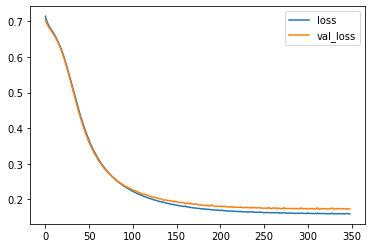

In [88]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding in DropOut Layers (let's make it better)

from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

## Model Evaluation

In [89]:
predictions = model.predict_classes(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        55
           1       0.93      0.92      0.93        88

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



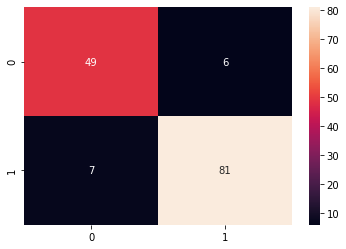

In [91]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)